<font color="red">__Sujet :__</font> Classification d'espèces de papillons.

<font color="red">__Auteurs :__</font> &copy; *Maxime Fleury, Adel Fodil-Cherif, Yann Lefrançois, Antoine Daussin* Master 2 Bioinformatique Université de Rennes, **UE Machine learning**.

<font color="red">__Dates :__</font> 4 septembre 2023 - 21 Novembre 2023 

# Introduction

Les papillons sont des espèces abondantes sur terre, et la tâche d'identification des papillons est complexe. Comment appliquer les méthodes de traitement d'images à l'identification automatique des espèces de papillons est une question brûlante dans la recherche actuelle. Ce projet a pour objectif de proposer des architectures de réseaux de neurones convolutifs afin de classifier des espèces de papillons. Pour cela le jeu de données utilisé est celui qui se trouve sur [Kaggle](https://www.kaggle.com/datasets/gpiosenka/butterfly-images40-species). Pour des raisons de temps, d'espace disque et de puissance de calcul, nous nous focalisons seulement sur les dix premières espèces qui sont *Adonis*, *African Giant Swallowtail*, *American snoot*, *AN 88*, *Appollo*, *ARCIGERA FLOWER MOTH*, *Atala*, *Atlas Smoth*, *BANDED ORANGE HELICONIAN* et *BANDED PEACOCK*. Le jeu de données est séparé en trois jeux distincts: jeu d'entrainement, jeu de validation et jeu de test. Pour le jeu d'entrainement, nous appliquons une augmentation de données en faisant subir des transformations à nos images. 

Notre recherche s'articule autour de trois axes: le premier axe étudie les images en couleurs dans le cas où les images de papillons sont prises le jour, le deuxième axe étudie les images en noire et blanc dans le cas où les photos de papillons sont prises de nuit et le dernier axe regroupe toutes ces images pour une étude généralisée.


# Librairies

In [ ]:
from __future__ import division, print_function, absolute_import
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.layers import Activation, Input
from keras import backend as k
from keras import optimizers, Model
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
import numpy as np
import requests
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow import keras
from keras import layers
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

# Import des données 

Chaque jeu de données (test, entrainement et validation) est normalisé.

In [ ]:
# Normalization to apply.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )
valid_datagen = ImageDataGenerator( rescale = 1.0/255. )

#Import of data and buiding of train dataset, validation dataset and test dataset.
train_generator = train_datagen.flow_from_directory(
        '/Users/fleury/Desktop/cours_fac/MASTER_BIO_INFORMATIQUE/master_2/semestre_1/Machine_Learning/PROJET/projet_final/train/',  
        target_size=(224, 224),  
        batch_size=batch_size,
        class_mode='categorical')
test_generator = test_datagen.flow_from_directory(
        '/Users/fleury/Desktop/cours_fac/MASTER_BIO_INFORMATIQUE/master_2/semestre_1/Machine_Learning/PROJET/projet_final/test/',
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle = False)  
valid_generator = valid_datagen.flow_from_directory(
        '/Users/fleury/Desktop/cours_fac/MASTER_BIO_INFORMATIQUE/master_2/semestre_1/Machine_Learning/PROJET/projet_final/valid/',
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical')

# Modèle 1

Ce modèle cherche à construire une architecture de réseaux de neurones convolutifs appliquée sur des images en couleurs afin de savoir si avec la forme des ailes, la forme de motifs, les nuances de couleurs des ailes et des motifs ou les couleurs de fond par exemple permettent de faire une bonne classification des différentes espèces.

## Architectures

In [ ]:
batch = 50

# Normalization to apply.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )
valid_datagen = ImageDataGenerator( rescale = 1.0/255. )

#Import of data and buiding of train dataset, validation dataset and test dataset.
train_generator = train_datagen.flow_from_directory(
        'C:/Users/yannl/Desktop/MLB/projet/train',
        target_size=(224, 224),
        batch_size=batch,
        class_mode='categorical')
test_generator = test_datagen.flow_from_directory(
        'C:/Users/yannl/Desktop/MLB/projet/test',
        target_size=(224, 224),
        batch_size=batch,
        class_mode='categorical',
        shuffle=False)
valid_generator = valid_datagen.flow_from_directory(
        'C:/Users/yannl/Desktop/MLB/projet/valid',
        target_size=(224, 224),
        batch_size=batch,
        class_mode='categorical')

# Number of class is the spece's number. We have 10 speces.
num_classes = 10

# Model creation.
model = keras.models.Sequential()

# We work on complex image so we start with law layer.
# The matrix of convolution have (3, 3) dimension and we choose the relu activation.
model.add(keras.layers.Conv2D(16, (3, 3), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Conv2D(256, (3, 3), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Conv2D(512, (3, 3), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Dropout(0.2))

# Neural Network.
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1000, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(500, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(150, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_classes, activation='softmax'))

## Compilation

In [ ]:
model.compile(optimizer = 'adam', loss = "categorical_crossentropy", metrics = ['accuracy'])
epochs = 30
history = model.fit(train_generator, validation_data = valid_generator, batch_size = batch, epochs = epochs )

## Résultats

Model: "sequential"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   

=================================================================
 conv2d (Conv2D)             (None, None, None, 16)    448       
                                                                 
 batch_normalization (Batch  (None, None, None, 16)    64        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, None, None, 16)    0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, None, None, 16)    0         
                                                                 
 conv2d_1 (Conv2D)           (None, None, None, 32)    4640      
                                                                 
 batch_normalization_1 (Bat  (None, None, None, 32)    128       
 chNormalization)                                                
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, None, None, 32)    0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, None, None, 32)    0         
                                                                 
 conv2d_2 (Conv2D)           (None, None, None, 64)    18496     
                                                                 
 batch_normalization_2 (Bat  (None, None, None, 64)    256       
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, None, None, 64)    0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, None, None, 64)    0         
                                                                 
 conv2d_3 (Conv2D)           (None, None, None, 128)   73856     
                                                                 
 batch_normalization_3 (Bat  (None, None, None, 128)   512       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, None, None, 128)   0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, None, None, 128)   0         
                                                                 
 conv2d_4 (Conv2D)           (None, None, None, 256)   295168    
                                                                 
 batch_normalization_4 (Bat  (None, None, None, 256)   1024      
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, None, None, 256)   0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, None, None, 256)   0         
                                                                 
 flatten (Flatten)           (None, None)              0         
                                                                 
 dense (Dense)               (None, 1000)              6401000   
                                                                 
 dropout_5 (Dropout)         (None, 1000)              0         
                                                                 
 flatten_1 (Flatten)         (None, 1000)              0         
                                                                 
 dense_1 (Dense)             (None, 500)               500500    
                                                                 
 dropout_6 (Dropout)         (None, 500)               0         
                                                                 
 flatten_2 (Flatten)         (None, 500)               0         
                                                                 
 dense_2 (Dense)             (None, 150)               75150     
                                                                 
 dropout_7 (Dropout)         (None, 150)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1510      
                                                                 
=================================================================

Total params: 7372752 (28.12 MB)

Trainable params: 7371760 (28.12 MB)

Non-trainable params: 992 (3.88 KB)

_________________________________________________________________


In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [1]:
from IPython.display import Image

Image(filename='/Users/fleury/Desktop/cours_fac/MASTER_BIO_INFORMATIQUE/master_2/semestre_1/Machine_Learning/PROJET/projet_final/rapport/yann/to_zip/train_val_loss_30epoch_258.png', width=700, height=700)

In [ ]:
labels = test_generator.labels
labels = np.array(labels)
y = model.predict(test_generator)
y_pred = np.argmax(y, axis= 1)
M = confusion_matrix(labels, y_pred)
#print("Confusion matrix")
#print(M)
print("Classification error: ", np.round((1-np.sum(np.diag(M))/np.shape(y_pred)[0])*100,2),"%")

Nous obtenons un pourcentage d'erreur de classification de $4.0$ %.

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(M,annot=True)
plt.title("Matrice de confusion")
plt.xlabel("Véritables labels des espèces")
plt.ylabel("Labels prédits des espèces")

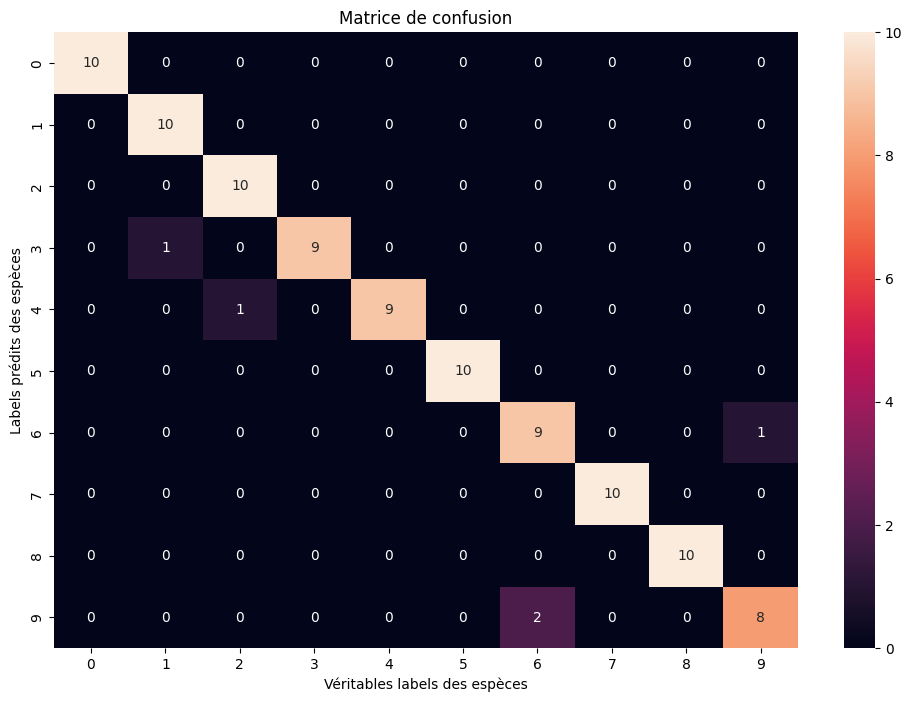

In [2]:
from IPython.display import Image

Image(filename='/Users/fleury/Desktop/cours_fac/MASTER_BIO_INFORMATIQUE/master_2/semestre_1/Machine_Learning/PROJET/projet_final/rapport/yann/to_zip/heatmap_256_5%.png', width=700, height=700)

# Modèle 2

Nous cherchons maintenant à savoir s'il est possible de créer une architecture de réseaux de neurones convolutifs adaptée pour les papillons dont l'image aura été prise de nuit. Pour respecter le cadre biologique, nous utilisons dans ce modèle un jeu de données composé d'images en noir et blanc. Nous essayons de savoir si la forme des ailes, la formes des motifs et les nuances de noir et de blanc sont des facteurs qui permettent la classification des espèces.

## Architecture 1

In [ ]:
batch_size = 100

# Normalization to apply.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )
valid_datagen = ImageDataGenerator( rescale = 1.0/255. )

#Import of data and buiding of train dataset, validation dataset and test dataset.
train_generator = train_datagen.flow_from_directory(
        '/Users/fleury/Desktop/cours_fac/MASTER_BIO_INFORMATIQUE/master_2/semestre_1/Machine_Learning/PROJET/projet_final/train/',  
        target_size=(224, 224),  
        batch_size=batch_size,
        class_mode='categorical')
test_generator = test_datagen.flow_from_directory(
        '/Users/fleury/Desktop/cours_fac/MASTER_BIO_INFORMATIQUE/master_2/semestre_1/Machine_Learning/PROJET/projet_final/test/',
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle = False)  
valid_generator = valid_datagen.flow_from_directory(
        '/Users/fleury/Desktop/cours_fac/MASTER_BIO_INFORMATIQUE/master_2/semestre_1/Machine_Learning/PROJET/projet_final/valid/',
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical')  

# Number of class is the spece's number. We have 10 speces.
num_classes = 10  

# Model creation.
model = keras.models.Sequential()


# We work on complex image so we start with law layer.
# The matrix of convolution have (3, 3) dimension and we choose the relu activation.
model.add(keras.layers.Conv2D(16, (5, 5), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Dropout(0.2))


model.add(keras.layers.Conv2D(32, (5, 5), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Dropout(0.2))


model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Dropout(0.2))


model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Dropout(0.2))

# Neural Network.
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu')) 
model.add(keras.layers.Dropout(0.8))
model.add(keras.layers.Dense(num_classes, activation='softmax'))

model.compile(optimizer = 'adam', loss = "categorical_crossentropy", metrics = ['accuracy'])

epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor= 'val_loss', patience= 5)
history = model.fit(train_generator, validation_data = valid_generator, batch_size = batch_size,\
                    epochs = epochs, callbacks = [early_stopping])

In [ ]:
history_dict = history.history
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss'] 
epochs = range(1, len(loss_values) + 1) 
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [3]:
from IPython.display import Image
Image(filename='/Users/fleury/Desktop/cours_fac/MASTER_BIO_INFORMATIQUE/master_2/semestre_1/Machine_Learning/PROJET/projet_final/output/experience2/evalmod.png', width=700, height=700)

In [ ]:
labels = test_generator.labels
labels = np.array(labels)
y = model.predict(test_generator)
y_pred = np.argmax(y, axis= 1)
M = confusion_matrix(labels, y_pred)
print("Classification error: ", np.round((1-np.sum(np.diag(M))/np.shape(y_pred)[0])*100,2),"%")

Nous obtenons un pourcentage d'erreur de classification de $45.2$ %.

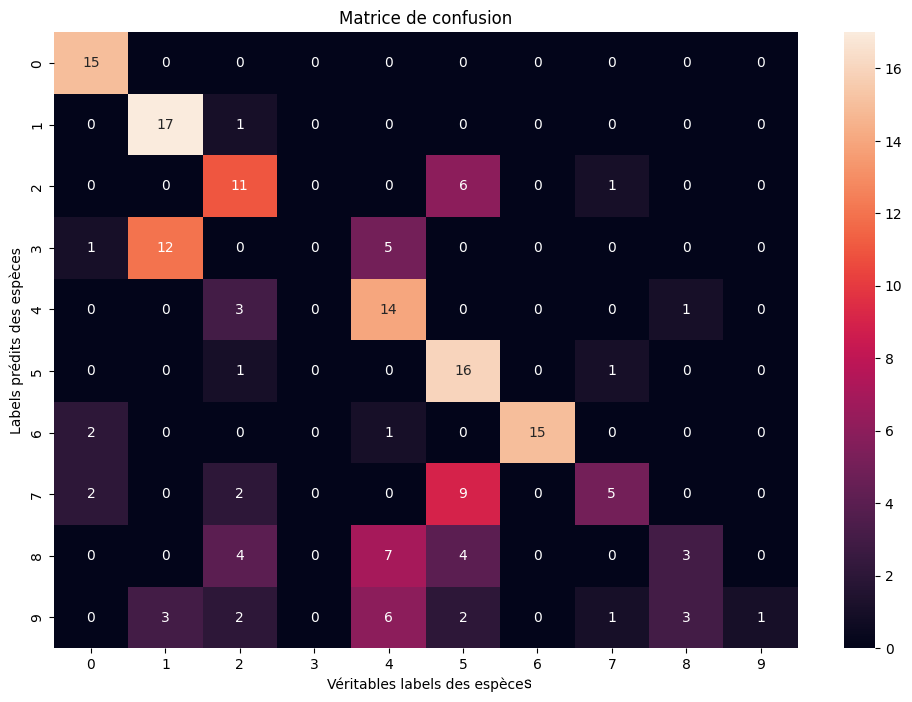

In [4]:
from IPython.display import Image
Image(filename='/Users/fleury/Desktop/cours_fac/MASTER_BIO_INFORMATIQUE/master_2/semestre_1/Machine_Learning/PROJET/projet_final/output/experience2/matconfu.png', width=700, height=700)

Le premier résultats n'est pas satisfaisant car le taux d'erreur est assez important.

## Architecture 2

Dans cette partie nous continuons l'exploration des paramètres avec la même architecture précédente mais en augmentant le batch size et la dimensions des matrices de convolution sur chaque couche de convolution. Le code est le suivant.

In [ ]:
# Batch size to apply on all the CNN.
batch_size = 400

# Normalization to apply.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )
valid_datagen = ImageDataGenerator( rescale = 1.0/255. )

#Import of data and buiding of train dataset, validation dataset and test dataset.
train_generator = train_datagen.flow_from_directory(
        '/Users/fleury/Desktop/cours_fac/MASTER_BIO_INFORMATIQUE/master_2/semestre_1/Machine_Learning/PROJET/projet_final/train/',  
        target_size=(224, 224),  
        batch_size=batch_size,
        class_mode='categorical')
test_generator = test_datagen.flow_from_directory(
        '/Users/fleury/Desktop/cours_fac/MASTER_BIO_INFORMATIQUE/master_2/semestre_1/Machine_Learning/PROJET/projet_final/test/',
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)  
valid_generator = valid_datagen.flow_from_directory(
        '/Users/fleury/Desktop/cours_fac/MASTER_BIO_INFORMATIQUE/master_2/semestre_1/Machine_Learning/PROJET/projet_final/valid/',
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical')  

# Number of class is the spece's number. We have 10 speces.
num_classes = 10  

# Model creation.
model = keras.models.Sequential()

# We work on complex image so we start with law layer.
# The matrix of convolution have (3, 3) dimension and we choose the relu activation.
model.add(keras.layers.Conv2D(16, (5, 5), activation='relu'))
#model.add(keras.layers.Conv2D(16, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Conv2D(32, (5, 5), activation='relu'))
#model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Conv2D(64, (5, 5), activation='relu'))
#model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Conv2D(128, (5, 5), activation='relu'))
#model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Dropout(0.2))

# Neural Network.
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(500, activation='relu')) 
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(num_classes, activation='softmax'))


model.compile(optimizer = 'adam', loss = "categorical_crossentropy", metrics = ['accuracy'])
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor= 'val_loss', patience= 3)
history = model.fit(train_generator, validation_data = valid_generator, batch_size = batch_size,\
                    epochs = epochs, callbacks = [early_stopping])

In [ ]:
history_dict = history.history
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss'] 
epochs = range(1, len(loss_values) + 1) 
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [5]:
from IPython.display import Image
Image(filename='/Users/fleury/Desktop/cours_fac/MASTER_BIO_INFORMATIQUE/master_2/semestre_1/Machine_Learning/PROJET/projet_final/output/experience1/evalmod.png', width=700, height=700)

In [ ]:
labels = test_generator.labels
labels = np.array(labels)
y = model.predict(test_generator)
y_pred = np.argmax(y, axis= -1)
M = confusion_matrix(labels, y_pred)
print("Classification error: ", np.round((1-np.sum(np.diag(M))/np.shape(y_pred)[0])*100,2),"%")
plt.figure(figsize=(12,8))
sns.heatmap(M,annot=True)
plt.title("Matrice de confusion")
plt.xlabel("Véritables labels des espèces")
plt.ylabel("Labels prédits des espèces")

Le pourcentage d'erreur de classification est de $22.03$ %.

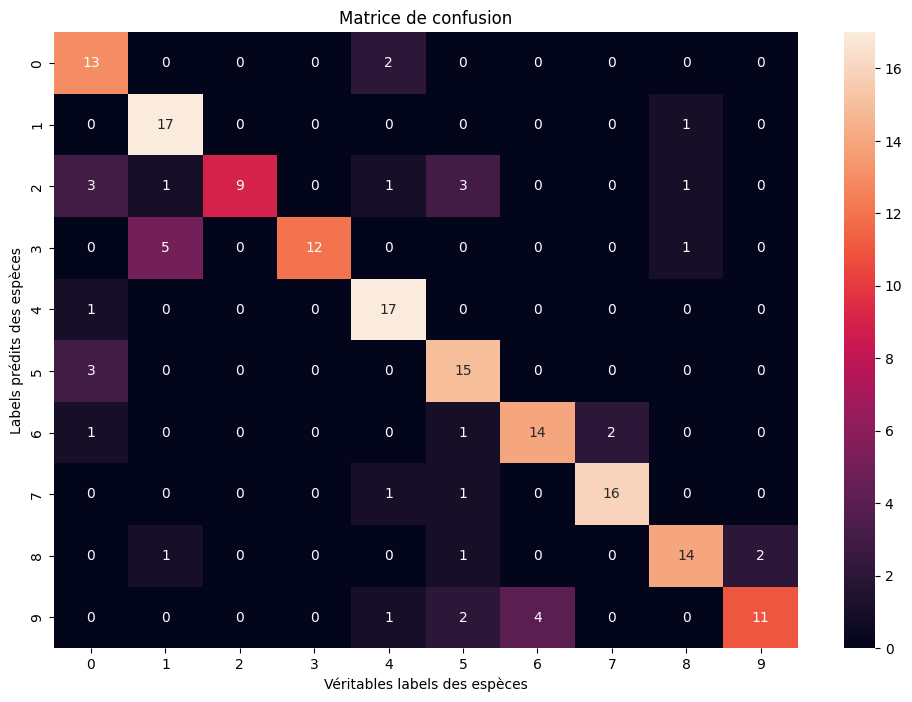

In [6]:
from IPython.display import Image
Image(filename='/Users/fleury/Desktop/cours_fac/MASTER_BIO_INFORMATIQUE/master_2/semestre_1/Machine_Learning/PROJET/projet_final/output/experience1/matconfu.png', width=700, height=700)

Les résulats sont bien meilleurs puisque nous avons un pourcentage d'erreur de classification qui a diminué. Nous observons que les courbes de la training loss et validation loss diminuent globalement mais pour la validation loss nous observons à la fin de l'apprentissages des pics révélateurs d'un potentiel surapprentissage.

Afin de continuer à faire diminuer le taux d'erreur je construis un dernier CNN plus complexe au niveau des couches de convolution et au niveau des couches de neurones.

## Architecture 3

In [ ]:
batch_size = 150

# Normalization to apply.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )
valid_datagen = ImageDataGenerator( rescale = 1.0/255. )

#Import of data and buiding of train dataset, validation dataset and test dataset.
train_generator = train_datagen.flow_from_directory(
        '/Users/fleury/Desktop/cours_fac/MASTER_BIO_INFORMATIQUE/master_2/semestre_1/Machine_Learning/PROJET/projet_final/train/',  
        target_size=(224, 224),  
        batch_size=batch_size,
        class_mode='categorical')
test_generator = test_datagen.flow_from_directory(
        '/Users/fleury/Desktop/cours_fac/MASTER_BIO_INFORMATIQUE/master_2/semestre_1/Machine_Learning/PROJET/projet_final/test/',
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)  
valid_generator = valid_datagen.flow_from_directory(
        '/Users/fleury/Desktop/cours_fac/MASTER_BIO_INFORMATIQUE/master_2/semestre_1/Machine_Learning/PROJET/projet_final/valid/',
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical')  

# Number of class is the spece's number. We have 10 speces.
num_classes = 10  

# Model creation.
model = keras.models.Sequential()

# We work on complex image so we start with law layer.
# The matrix of convolution have (3, 3) dimension and we choose the relu activation.
model.add(keras.layers.Conv2D(16, (3, 3), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Conv2D(1024, (3, 3), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Conv2D(2048, (3, 3), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Dropout(0.2))

# Neural Network.
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1000, activation='relu')) 
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(500, activation='relu')) 
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(150, activation='relu')) 
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_classes, activation='softmax'))

model.compile(optimizer = 'adam', loss = "categorical_crossentropy", metrics = ['accuracy'])
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor= 'val_loss', patience= 5)
history = model.fit(train_generator, validation_data = valid_generator, batch_size = batch_size,\
                    epochs = epochs, callbacks = [early_stopping])

In [ ]:
history_dict = history.history
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss'] 
epochs = range(1, len(loss_values) + 1) 
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

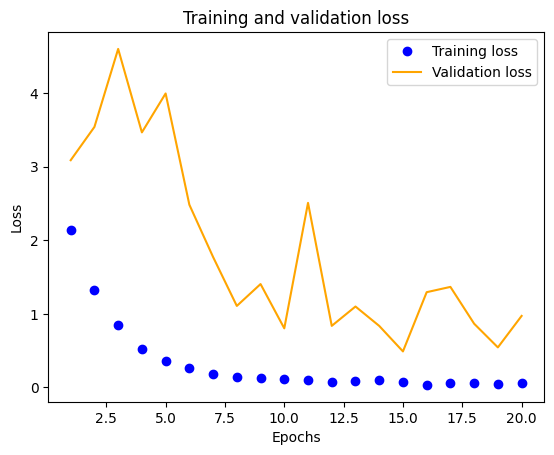

In [7]:
from IPython.display import Image
Image(filename='/Users/fleury/Desktop/cours_fac/MASTER_BIO_INFORMATIQUE/master_2/semestre_1/Machine_Learning/PROJET/projet_final/output/experience 3/evalmod.png', width=700, height=700)

In [ ]:
labels = test_generator.labels
labels = np.array(labels)
y = model.predict(test_generator)
y_pred = np.argmax(y, axis= 1)
M = confusion_matrix(labels, y_pred)
print("Classification error: ", np.round((1-np.sum(np.diag(M))/np.shape(y_pred)[0])*100,2),"%")
plt.figure(figsize=(12,8))
sns.heatmap(M,annot=True)
plt.title("Matrice de confusion")
plt.xlabel("Véritables labels des espèces")
plt.ylabel("Labels prédits des espèces")

Nous obtenons un pourcentage d'erreur de classification de $12.43$ %. Les résultats sont donc bien meilleurs mais il faut garder du recul sur nos résultats car, même si les courbes de la training loss et de la validation loss diminuent, nous observons sur la courbe de la validation loss que le nombre de pic et plus important et plus prononcés. Ces pics sont révélateurs d'un potentiel surapprentissage.

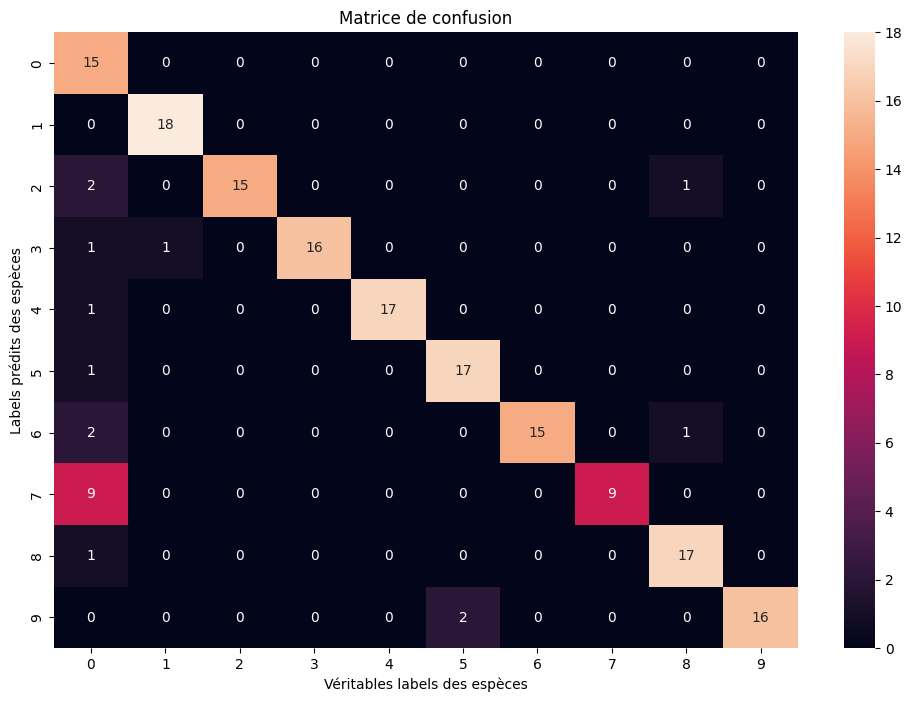

In [8]:
from IPython.display import Image
Image(filename='/Users/fleury/Desktop/cours_fac/MASTER_BIO_INFORMATIQUE/master_2/semestre_1/Machine_Learning/PROJET/projet_final/output/experience 3/matconfu.png', width=700, height=700)

Nous pouvons dire qu'il est possible de créer un réseau de neurones convolutifs pour les papillons capturés de nuit mais il faut continuer l'exploration des paramètres pour cette architecture afin de poursuivre la diminution du taux d'erreur et augmenter les jeux de test et de validation afin d'atténuer l'effet de surapprentissage.

# Modèle 3

## Architecture de départ

In [ ]:
# Number of class is the spece's number. We have 10 speces.
num_classes = 10

# Model creation.
model = keras.models.Sequential()

# We work on complex image so we start with law layer.
# The matrix of convolution have (3, 3) dimension and we choose the relu activation.

model.add(keras.layers.Conv2D(16, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Dropout(0.2))

# Neural Network.
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(500, activation='relu')) # Nbr Neurones
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_classes, activation='softmax'))

model.compile(optimizer = 'adam', loss = "categorical_crossentropy", metrics = ['accuracy'])

Après observation des résultat d'early stopping, j'observe des resultats différents causés par un stop trop tôt. De plus, en général les résultats ne s'ameliorent pas au dessus de 30 epochs.
J'utilise donc 30 epoch sans early stopping pour comparer les résultats

In [ ]:
epochs = 30
early_stopping = tf.keras.callbacks.EarlyStopping(monitor= 'val_loss', patience= 10)
history = model.fit(train_generator, validation_data = valid_generator, batch_size = batch_size,\
                    epochs = epochs)

### Résultats pour l'architecture de départ (Batch size = 600)

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

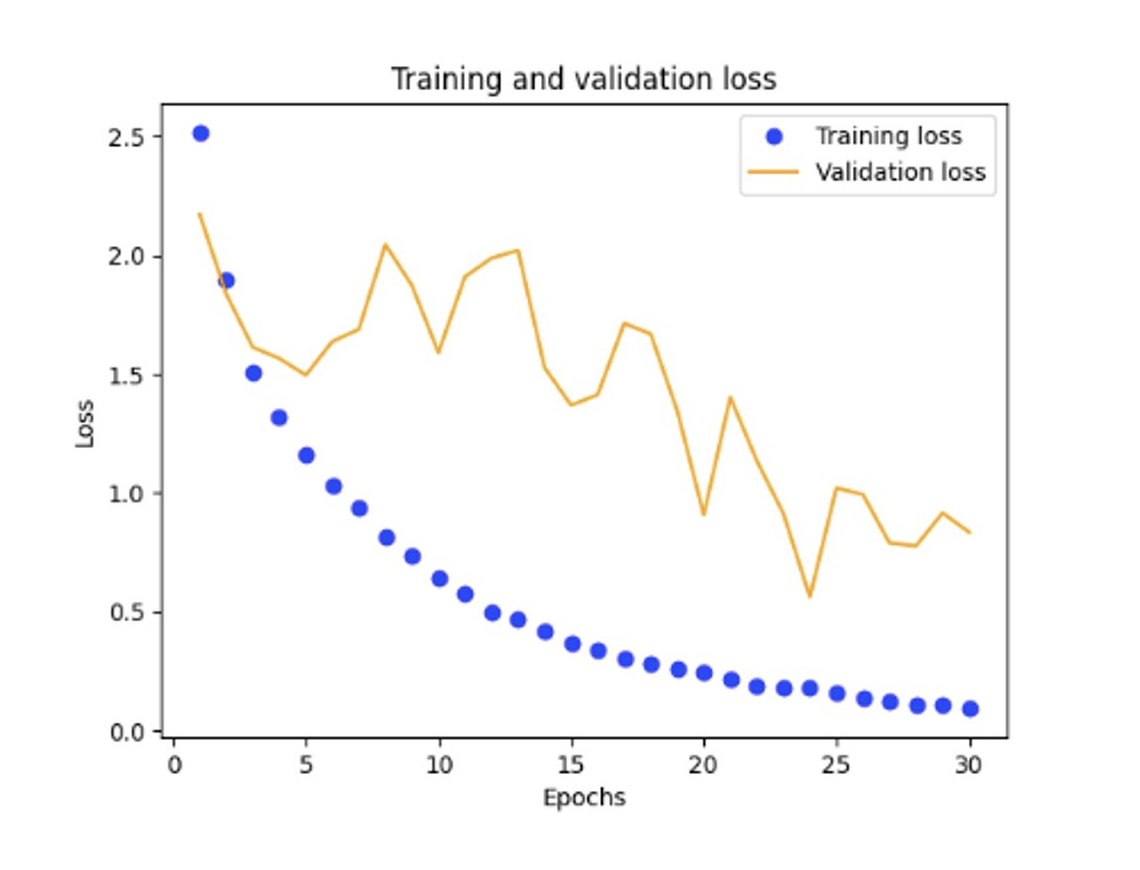

In [1]:
from IPython.display import Image
Image(filename='/Users/fleury/Desktop/cours_fac/MASTER_BIO_INFORMATIQUE/master_2/semestre_1/Machine_Learning/PROJET/projet_final/rapport/Capture d’écran 2023-11-20 à 18.41.10.png', width=700, height=700)

In [ ]:
labels = test_generator.labels
labels = np.array(labels)
y = model.predict(test_generator)
y_pred = np.argmax(y, axis= -1)
M = confusion_matrix(labels, y_pred)
print("Classification error: ", np.round((1-np.sum(np.diag(M))/np.shape(y_pred)[0])*100,2),"%")
plt.figure(figsize=(12,8))
sns.heatmap(M,annot=True)
plt.title("Matrice de confusion")
plt.xlabel("Véritables labels des espèce")
plt.ylabel("Labels prédits des espèces")

Nous obtenons un pourcentage d'erreur de classification de $29$ %.

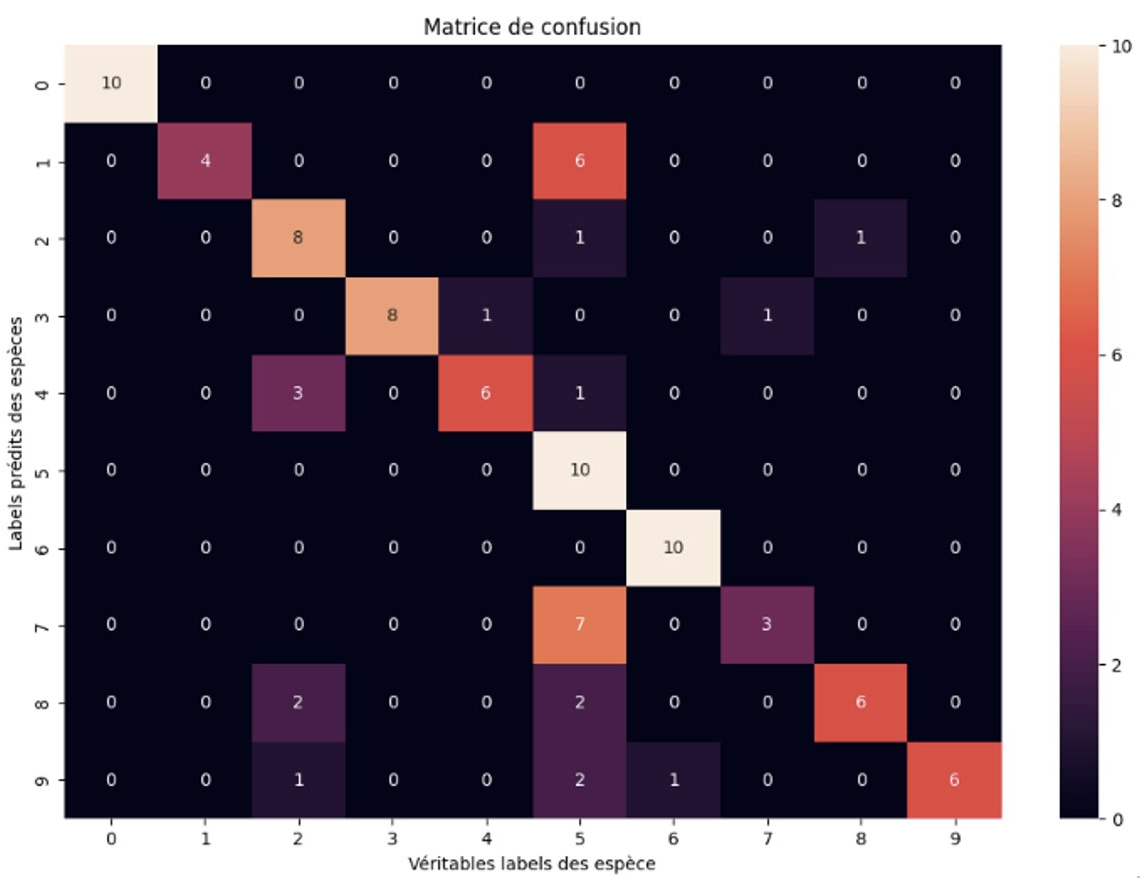

In [2]:
from IPython.display import Image
Image(filename='/Users/fleury/Desktop/cours_fac/MASTER_BIO_INFORMATIQUE/master_2/semestre_1/Machine_Learning/PROJET/projet_final/rapport/Capture d’écran 2023-11-20 à 18.43.24.png', width=700, height=700)

### Modification expérimentale des variables

Afin de voir l'influence des paramètres (valeur de batch size et modification des couches convolutives) if faut se référer au diaporama du groupes de la slide 25 à la slide 32.

## Architecture

In [ ]:
# Number of class is the spece's number. We have 10 speces.
num_classes = 10

# Model creation.
model = keras.models.Sequential()

# We work on complex image so we start with law layer.
# The matrix of convolution have (3, 3) dimension and we choose the relu activation.

model.add(keras.layers.Conv2D(16, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Conv2D(256, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Conv2D(512, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Dropout(0.2))

# Neural Network.
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1000, activation='relu')) # Nbr Neurones
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1000, activation='relu')) # Nbr Neurones
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_classes, activation='softmax'))

## Compilation

Nos variables à prédire sont de types qualitatives (espèce de papillon) et nous avons plus de deux labels donc nous choisissons une fonction de coût de type "categorical_crossentropy". De plus l'optimisateur est "adam" car dans la plupart des bibliographies sur des classifications d'objets, "adam" revient le plus souvent.

In [ ]:
model.compile(optimizer = 'adam', loss = "categorical_crossentropy", metrics = ['accuracy'])

Après observation des résultat d'early stopping, j'observe des resultats différents causés par un stop trop tôt. De plus, en général les résultats ne s'ameliorent pas au dessus de 30 epochs.
J'utilise donc 30 epoch sans early stopping pour comparer les résultats

In [ ]:
epochs = 30
early_stopping = tf.keras.callbacks.EarlyStopping(monitor= 'val_loss', patience= 10)
history = model.fit(train_generator, validation_data = valid_generator, batch_size = batch_size,\
                    epochs = epochs)

### Résultats pour l'architecture finale (Batch size = 200) 

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [9]:
from IPython.display import Image
Image(filename='/Users/fleury/Desktop/cours_fac/MASTER_BIO_INFORMATIQUE/master_2/semestre_1/Machine_Learning/PROJET/projet_final/rapport/antoine/Data_antoine/Capture d’écran 2023-11-18 à 15.50.52.png', width=700, height=700)

In [ ]:
labels = test_generator.labels
labels = np.array(labels)
y = model.predict(test_generator)
y_pred = np.argmax(y, axis= -1)
M = confusion_matrix(labels, y_pred)
print("Classification error: ", np.round((1-np.sum(np.diag(M))/np.shape(y_pred)[0])*100,2),"%")
plt.figure(figsize=(12,8))
sns.heatmap(M,annot=True)
plt.title("Matrice de confusion")
plt.xlabel("Véritables labels des espèce")
plt.ylabel("Labels prédits des espèces")

Nous obtenons un pourcentage d'erreur de classification de $3$ %.

In [11]:
from IPython.display import Image
Image(filename='/Users/fleury/Desktop/cours_fac/MASTER_BIO_INFORMATIQUE/master_2/semestre_1/Machine_Learning/PROJET/projet_final/rapport/antoine/Data_antoine/Capture d’écran 2023-11-18 à 15.51.21.png', width=700, height=700)